第11章　サンプリング法
==

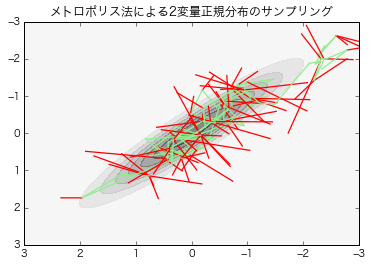

In [265]:
from scipy.stats import multivariate_normal

def plot_metropolis_sampling(n_iter=150, sig=0.5):
    """ メトロポリスサンプリングを描く """
    sig12 = np.random.rand() * 2 - 1
    var = multivariate_normal(mean=[0, 0], cov=[[1, sig12], [sig12, 1]])
    
    mc = np.zeros((n_iter, 2))
    mc[0] = np.random.randn(2)
    for i in range(1, n_iter):
        z = np.random.randn(2) * sig + mc[i - 1]
        acc = np.min([1., var.pdf(z) / var.pdf(mc[i - 1])])
        if np.random.rand() <= acc:
            mc[i] = z
            color = 'lightgreen'
        else:
            mc[i] = mc[i - 1]
            color = 'r'
        x = [mc[i - 1, 0], z[0]]
        y = [mc[i - 1, 1], z[1]]
        plt.plot(x, y, color=color, lw=1.25)
    
    bins = np.linspace(3, -3, 1001)
    x, y = np.meshgrid(bins, bins)
    z = var.pdf(np.c_[x.flatten(), y.flatten()]).reshape((1001, 1001))
    plt.contourf(bins, bins, z, cmap='gray_r', alpha=0.5)  
    plt.xlim(3, -3)
    plt.ylim(3, -3)
    plt.title('メトロポリス法による2変量正規分布のサンプリング')
    
plot_metropolis_sampling()